In [0]:
import librosa
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import plotly.graph_objs as go
#import plotly.offline as py
#import plotly.tools as tls
#import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
#py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical



Using TensorFlow backend.


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
#from tqdm import tqdm

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
samples, sample_rate = librosa.load('/content/gdrive/My Drive/TESS Toronto emotional speech set data/angry/OAF_back_angry.wav')

In [0]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [0]:
aa , bb = librosa.effects.trim(samples, top_db=30)

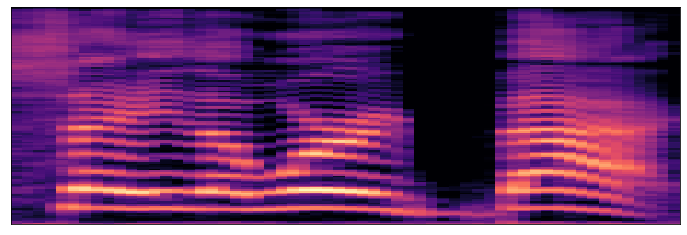

In [0]:
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
image=librosa.display.specshow(log_S, sr=sample_rate)
#plt.title('Mel power spectrogram ')
#plt.colorbar(format='%+02.0f dB')
#plt.tight_layout()

array(<matplotlib.axes._subplots.AxesSubplot object at 0x7f2de17898>,
      dtype=object)

In [0]:
import os
os.mkdir('/content/gdrive/My Drive/TESS Toronto emotional speech set data/train')
file_list=['angry','disgust','fear','Happy','neutral','Pleasant_surprise','Sad']
for f in file_list:
  os.chdir('/content/gdrive/My Drive/TESS Toronto emotional speech set data/'+ f)#angry,fear,sad,happy,surprise,neutral
  os.mkdir('/content/gdrive/My Drive/TESS Toronto emotional speech set data/train/'+f)
  counter=0
  path_file='/content/gdrive/My Drive/TESS Toronto emotional speech set data/'+ f
  for file in os.listdir(r'/content/gdrive/My Drive/TESS Toronto emotional speech set data/'+ f):
      samples, sample_rate = librosa.load(os.path.join(path_file,file))
      aa , bb = librosa.effects.trim(samples, top_db=30)
      S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
      log_S = librosa.power_to_db(S, ref=np.max)
      plt.figure(figsize=(12, 4))
      img = librosa.display.specshow(log_S, sr=sample_rate)
      file_name = f+'.'+str(counter)+'.jpg'
      plt.savefig('/content/gdrive/My Drive/TESS Toronto emotional speech set data/train/'+f+'/'+file_name)
      counter+=1

In [0]:
print( os.getcwd() )
print( os.listdir() )

/content/gdrive/My Drive/TESS Toronto emotional speech set data/disgust
['OAF_home_disgust.wav', 'OAF_check_disgust.wav', 'OAF_jar_disgust.wav', 'OAF_hole_disgust.wav', 'OAF_have_disgust.wav', 'OAF_hall_disgust.wav', 'OAF_bath_disgust.wav', 'OAF_fit_disgust.wav', 'OAF_doll_disgust.wav', 'OAF_book_disgust.wav', 'OAF_fail_disgust.wav', 'OAF_five_disgust.wav', 'OAF_dodge_disgust.wav', 'OAF_bone_disgust.wav', 'OAF_gun_disgust.wav', 'OAF_far_disgust.wav', 'OAF_cab_disgust.wav', 'OAF_good_disgust.wav', 'OAF_beg_disgust.wav', 'OAF_dab_disgust.wav', 'OAF_gap_disgust.wav', 'OAF_choice_disgust.wav', 'OAF_chain_disgust.wav', 'OAF_food_disgust.wav', 'OAF_bite_disgust.wav', 'OAF_bought_disgust.wav', 'OAF_goose_disgust.wav', 'OAF_get_disgust.wav', 'OAF_dip_disgust.wav', 'OAF_ditch_disgust.wav', 'OAF_gas_disgust.wav', 'OAF_goal_disgust.wav', 'OAF_cause_disgust.wav', 'OAF_jail_disgust.wav', 'OAF_dog_disgust.wav', 'OAF_deep_disgust.wav', 'OAF_chief_disgust.wav', 'OAF_gaze_disgust.wav', 'OAF_calm_disgus

In [0]:
# folders=['fear','sad','happy','disgust','Pleasent-surprise','neutral']
# dir_path='/content/gdrive/My Drive/TESS Toronto emotional speech set data'
# for f in folders:
#     os.mkdir(os.path.join(dir_path,f))
print(os.listdir())

['OAF_home_disgust.wav', 'OAF_check_disgust.wav', 'OAF_jar_disgust.wav', 'OAF_hole_disgust.wav', 'OAF_have_disgust.wav', 'OAF_hall_disgust.wav', 'OAF_bath_disgust.wav', 'OAF_fit_disgust.wav', 'OAF_doll_disgust.wav', 'OAF_book_disgust.wav', 'OAF_fail_disgust.wav', 'OAF_five_disgust.wav', 'OAF_dodge_disgust.wav', 'OAF_bone_disgust.wav', 'OAF_gun_disgust.wav', 'OAF_far_disgust.wav', 'OAF_cab_disgust.wav', 'OAF_good_disgust.wav', 'OAF_beg_disgust.wav', 'OAF_dab_disgust.wav', 'OAF_gap_disgust.wav', 'OAF_choice_disgust.wav', 'OAF_chain_disgust.wav', 'OAF_food_disgust.wav', 'OAF_bite_disgust.wav', 'OAF_bought_disgust.wav', 'OAF_goose_disgust.wav', 'OAF_get_disgust.wav', 'OAF_dip_disgust.wav', 'OAF_ditch_disgust.wav', 'OAF_gas_disgust.wav', 'OAF_goal_disgust.wav', 'OAF_cause_disgust.wav', 'OAF_jail_disgust.wav', 'OAF_dog_disgust.wav', 'OAF_deep_disgust.wav', 'OAF_chief_disgust.wav', 'OAF_gaze_disgust.wav', 'OAF_calm_disgust.wav', 'OAF_death_disgust.wav', 'OAF_date_disgust.wav', 'OAF_back_disgu

In [0]:
#naming files in test in numbers
# import os
# os.chdir('/content/gdrive/My Drive/TESS Toronto emotional speech set data/test')
# count=0
# for file in os.listdir():
#   src=file
#   dst=str(count)+".jpg"
#   os.rename(src,dst)
#   count=count+1


# vgg16

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.applications import VGG16
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Flatten,Dropout
from keras import backend as K
img_width=224
img_height=224

In [0]:
train_dir=r'/content/gdrive/My Drive/TESS Toronto emotional speech set data/train/' #change as per your system
test_dir=r'/content/gdrive/My Drive/TESS Toronto emotional speech set data/test/'
if K.image_data_format()=='channels_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)


In [0]:
vgg16 = VGG16(weights='imagenet', include_top=False)
vgg16.trainable=False


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
from keras.layers import GlobalAveragePooling2D
model=Sequential([vgg16,GlobalAveragePooling2D(),Dense(7,activation='softmax')])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 3591      
Total params: 14,718,279
Trainable params: 3,591
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                zoom_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)


In [0]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(img_width,img_height),
                                                 batch_size=10)

Found 2464 images belonging to 7 classes.


In [0]:
test_generator=test_datagen.flow_from_directory(test_dir,
                                                 target_size=(img_width,img_height),
                                                 batch_size=10)

Found 336 images belonging to 7 classes.


In [0]:
model.fit_generator(train_generator,steps_per_epoch=2450//10,epochs=100,validation_data=test_generator,
                   validation_steps=350//10)


Epoch 1/100
245/245 [==============================] - 1427s 6s/step - loss: 1.8373 - accuracy: 0.3187 - val_loss: 1.6212 - val_accuracy: 0.5173
Epoch 2/100
245/245 [==============================] - 1433s 6s/step - loss: 1.5821 - accuracy: 0.6088 - val_loss: 1.3190 - val_accuracy: 0.6301
Epoch 3/100
245/245 [==============================] - 1430s 6s/step - loss: 1.3968 - accuracy: 0.6751 - val_loss: 1.4090 - val_accuracy: 0.7168
Epoch 4/100
245/245 [==============================] - 1436s 6s/step - loss: 1.2523 - accuracy: 0.7279 - val_loss: 1.0722 - val_accuracy: 0.8237
Epoch 5/100
245/245 [==============================] - 1423s 6s/step - loss: 1.1429 - accuracy: 0.7668 - val_loss: 1.1378 - val_accuracy: 0.8121
Epoch 6/100
245/245 [==============================] - 1424s 6s/step - loss: 1.0494 - accuracy: 0.7706 - val_loss: 1.1733 - val_accuracy: 0.8526
Epoch 7/100
245/245 [==============================] - 1431s 6s/step - loss: 0.9731 - accuracy: 0.7966 - val_loss: 0.6857 - val_ac